# 1) 데이터 읽기


Sex : 성별  
Length : 길이  
Diameter : 직경  
Height : 높이  
Whole_weight : 전체 무게  
Shucked_weight : 껍질을 제거한 무게  
Viscera_weight : 내장 무게  
Shell_weight : 껍질 무게  
Rings : 고리 갯수  


In [61]:
import pandas as pd

df = pd.read_csv('./abalone.csv')

df = df.drop('id', axis = 1)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2) EDA 실행

## 2-1) 결측치 확인, 제거

In [62]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 2-2) 레이블 확인

Text(0.5, 1.0, 'How old is Abalone')

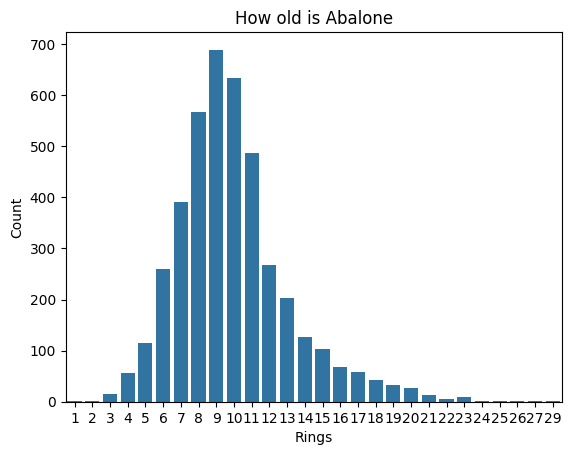

In [63]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("How old is Abalone")

In [64]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

## 2-3) 데이터 및 레이블 인코딩

정확도를 위해 value_count 갯수가 100개 미만인 행은 Outliar로 취급하고 삭제한다.

In [65]:
# 각 값의 개수를 계산
value_counts = df['Rings'].value_counts()

# 100개 이상인 값 필터링
to_keep = value_counts[value_counts >= 100].index

# 원본 DataFrame에서 해당 값을 가진 행만 남김
df = df[df['Rings'].isin(to_keep)]

Text(0.5, 1.0, 'How old is Abalone')

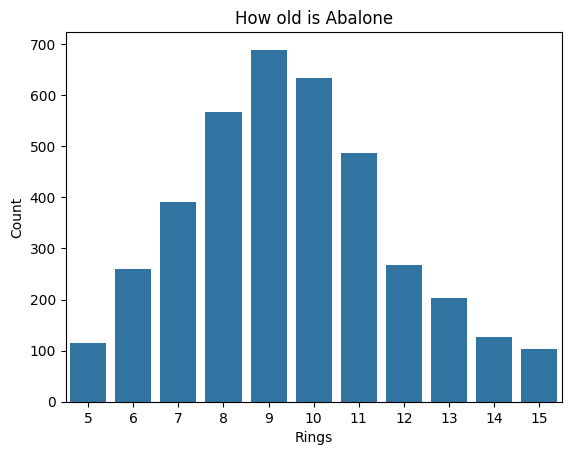

In [66]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("How old is Abalone")

Rings의 갯수를 Label encoding 해준다.

In [67]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# Rings 열에 label encoding 적용
df['Rings_encoded'] = label_encoder.fit_transform(df['Rings'])

df = df.drop('Rings', axis = 1)

df

C:\Users\황주신\AppData\Local\Temp\ipykernel_15380\56739163.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rings_encoded'] = label_encoder.fit_transform(df['Rings'])


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_encoded
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,10
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,4
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,6
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,4
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,5


Sex Column을 One-Hot Encoding 해준다.

In [68]:
df = pd.get_dummies(df, columns = ['Sex'])

df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_encoded,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,10,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,4,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,5,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,6,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,5,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,4,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,5,True,False,False


# 3) X, Y 나누기

In [69]:
X = df.drop('Rings_encoded', axis = 1)
Y = df['Rings_encoded']

print(X.head())
print()
print(Y.value_counts())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150  False  False   True  
1         0.070  False  False   True  
2         0.210   True  False  False  
3         0.155  False  False   True  
4         0.055  False   True  False  

Rings_encoded
4     689
5     634
3     568
6     487
2     391
7     267
1     259
8     203
9     126
0     115
10    103
Name: count, dtype: int64


# 4) 데이터 스케일링

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5) Train데이터, Test데이터 나누기

In [71]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 6) 딥러닝 모델 정의

In [72]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# CNN 레이어 추가 (필터 크기와 커널 크기는 조정 가능)
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(10, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation = "softmax"))

# 모델 컴파일
model.compile(Adam(learning_rate = 0.01), 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 모델 요약
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 9, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,067 (35.42 KB)

 Trainable params: 9,067 (35.42 KB)

 Non-trainable params: 0 (0.00 B)

# 7) 학습, 예측

In [73]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 예측 (가장 높은 확률의 클래스 선택)
y_pred = np.argmax(model.predict(X_test), axis=-1)

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1930 - loss: 2.1707 - val_accuracy: 0.2328 - val_loss: 1.9449
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2377 - loss: 1.9601 - val_accuracy: 0.2614 - val_loss: 1.9014
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2318 - loss: 1.9534 - val_accuracy: 0.2393 - val_loss: 1.8761
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2592 - loss: 1.8848 - val_accuracy: 0.2562 - val_loss: 1.8704
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2686 - loss: 1.9276 - val_accuracy: 0.2913 - val_loss: 1.8347
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2521 - loss: 1.8809 - val_accuracy: 0.2887 - val_loss: 1.8283
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2799 - loss: 1.8419 - val_accuracy: 0.2861 - val_loss: 1.8205
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2524 - loss: 1.8765 - val_accuracy: 0.2874 - val_loss:

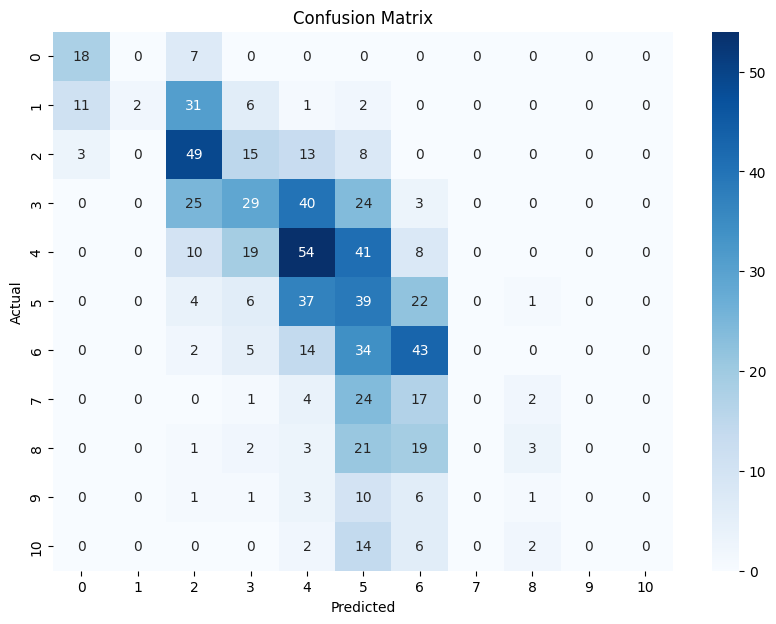

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.56      0.72      0.63        25
           1       1.00      0.04      0.07        53
           2       0.38      0.56      0.45        88
           3       0.35      0.24      0.28       121
           4       0.32      0.41      0.36       132
           5       0.18      0.36      0.24       109
           6       0.35      0.44      0.39        98
           7       0.00      0.00      0.00        48
           8       0.33      0.06      0.10        49
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        24

    accuracy                           0.31       769
   macro avg       0.31      0.26      0.23       769
weighted avg       0.33      0.31      0.27       769



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 성능 보고서
print(classification_report(Y_test, y_pred))


# 8) 모델 저장

In [76]:
import tensorflow as tf

model_file='./Abalone_CNN.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)

model saved at  ./Abalone_CNN.h5
